# Visualizing Mean, Median, and Mode in Python

This notebook demonstrates how to calculate and visualize **mean**, **median**, and **mode** using Python. 
We will generate a random dataset and use simple statistical methods to compute these measures of central tendency. 
Finally, we'll visualize these values on a single figure for a clear comparison.


In [1]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## Generating Random Data

In this section, we generate a random dataset. We will use a **log-normal distribution** for this purpose, a variation of the common normal distribution, and we introduce skewness.

- `mean=4.2`: The mean of the distribution is 4.2.
- `sigma=0.75`: The standard deviation is 50.
- `size=2000`: We will generate 10000 data points.


In [7]:
# Generating a positively skewed dataset using a log-normal distribution
np.random.seed(0)
data = np.random.lognormal(mean=4.2, sigma=0.75, size=2000)  # Log-normal distribution

#NB: the log-normal is a continous distrubtion. This is important for how we approach finding the mode below.


In [12]:
# Calculate mean, median, and mode
mean = np.mean(data)
median = np.median(data)

# Kernel Density Estimation to find the mode
kde = stats.gaussian_kde(data)
x_range = np.linspace(min(data), max(data), 1000)
mode_kde = x_range[np.argmax(kde(x_range))]

#NB: use stats.mode() is designed to work best with discrete distributions. We're working on a log-normal continuous distribution, so using a KDE is the best approach to find mode.



# Print the results for reference
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode (KDE): {mode_kde:.2f}")


Mean: 86.37
Median: 65.90
Mode (KDE): 46.02


## Visualizing the Data Distribution and Central Tendency

In this section, we'll visualize the distribution of the data using a **histogram**. We'll overlay the mean, median, and mode on the plot to compare how each of these measures is positioned relative to the data.

- **Red dashed line**: Mean
- **Green dashed line**: Median
- **Blue dashed line**: Mode

This visualization helps in understanding how the measures of central tendency relate to each other in this dataset.


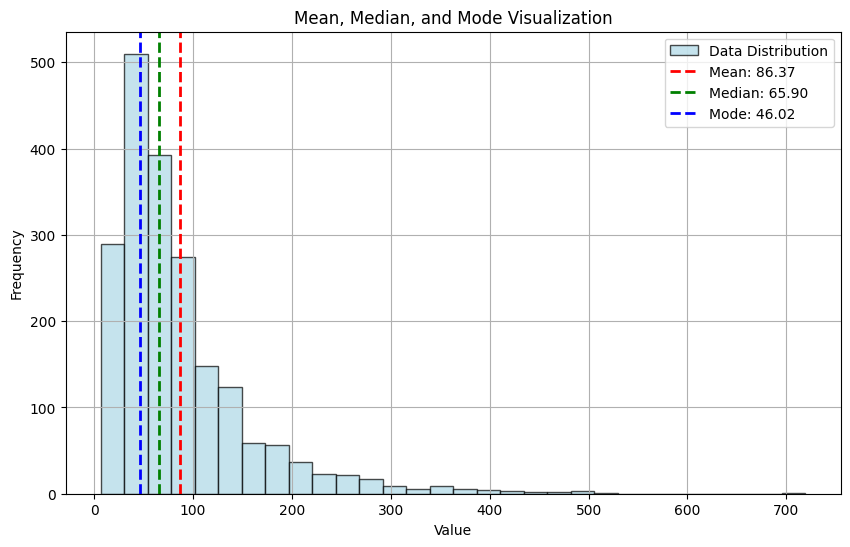

In [14]:
# Create the figure and subplots
plt.figure(figsize=(10, 6))

# Plot histogram of data
plt.hist(data, bins=30, color='lightblue', edgecolor='black', alpha=0.7, label='Data Distribution')

# Plot mean, median, and mode as vertical lines
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mode_kde, color='blue', linestyle='dashed', linewidth=2, label=f'Mode: {mode_kde:.2f}')

# Add labels and title
plt.title('Mean, Median, and Mode Visualization')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## Conclusion

In this notebook, we have calculated and visualized the **mean**, **median**, and **mode** of a randomly generated dataset. These measures of central tendency provide valuable insights into the distribution of data, and visualizing them together helps us see how they differ in their positioning.

- **Mean**: Sensitive to outliers.
- **Median**: Robust to outliers and skewed distributions.
- **Mode**: Useful for identifying the most common value, especially in categorical data.

By combining these measures, we gain a deeper understanding of the dataset.
